#Assignment 1: Distributions

###1. GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 6 different distributions (600 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 2 more of your choice.   

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

%matplotlib inline

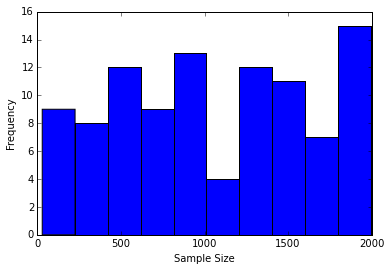

In [2]:
# Set random seed for reproducibility
np.random.seed(616)

# Generate 100 random sample sizes between 11 and 1999 (inclusive)
sizes = np.random.randint(11,1999,100)
#print(sizes)

# Plot histogram of sample sizes
plt.hist(sizes, bins=10)
plt.xlabel('Sample Size')
plt.ylabel('Frequency')

# Define 6 distributions to be tested
distributions = ['gaus', 'pois', 'binomial', 'chisq', 'lapl', 'logistic']

In [3]:
# Generate data for each of the 6 distributions with mean = 0
pop_mean = 0.5
pop_sd = 1

# data and means are empty dictionaries
data={}

for dist in distributions:
    data[dist] = []
    
print(data)

{'logistic': [], 'pois': [], 'gaus': [], 'chisq': [], 'lapl': [], 'binomial': []}


In [4]:
# Look through each sample size (100 in total) and calculate the data/means for the 6 distributions
for n in sizes:
            
    data['gaus'].append([n, np.mean(np.random.normal(pop_mean, 1.0, n))])
    
    data['pois'].append([n, np.mean(np.random.poisson(pop_mean, n))])
    
    data['chisq'].append([n, np.mean(np.random.chisquare(pop_mean, n))])
    
    data['lapl'].append([n, np.mean(np.random.laplace(pop_mean, 1.0, n))])
    
    data['logistic'].append([n, np.mean(np.random.logistic(pop_mean, 1.0, n))])
    
    data['binomial'].append([n, np.mean(np.random.binomial(1, pop_mean, n))])

###2. For each sample plot the sample mean against the sample size N (if you want you can do it with the sample standard deviation as well). Describe the behavior you see in the plots - do they look as you expected? why?

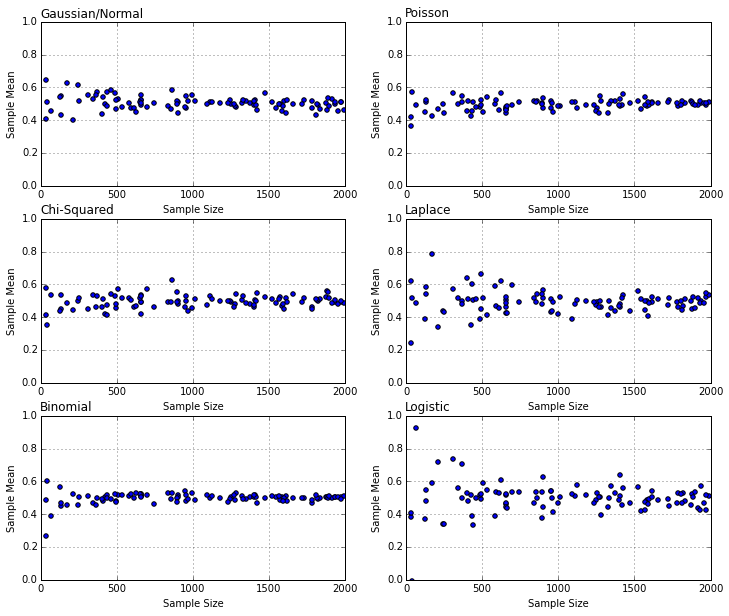

In [5]:
# Plot sample mean against sample size
plt.figure(figsize=(12,10))

plt.subplot(321)
plt.scatter([x[0] for x in data['gaus']], [x[1] for x in data['gaus']])
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.xlim(0,2000)
plt.ylim(0,1)
plt.title('Gaussian/Normal', loc='left')
plt.grid()

plt.subplot(322)
plt.scatter([x[0] for x in data['pois']], [x[1] for x in data['pois']])
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.xlim(0,2000)
plt.ylim(0,1)
plt.title('Poisson', loc='left')
plt.grid()

plt.subplot(323)
plt.scatter([x[0] for x in data['chisq']], [x[1] for x in data['chisq']])
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.xlim(0,2000)
plt.ylim(0,1)
plt.title('Chi-Squared', loc='left')
plt.grid()

plt.subplot(324)
plt.scatter([x[0] for x in data['lapl']], [x[1] for x in data['lapl']])
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.xlim(0,2000)
plt.ylim(0,1)
plt.title('Laplace', loc='left')
plt.grid()

plt.subplot(325)
plt.scatter([x[0] for x in data['binomial']], [x[1] for x in data['binomial']])
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.xlim(0,2000)
plt.ylim(0,1)
plt.title('Binomial', loc='left')
plt.grid()

plt.subplot(326)
plt.scatter([x[0] for x in data['logistic']], [x[1] for x in data['logistic']])
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.xlim(0,2000)
plt.ylim(0,1)
plt.title('Logistic', loc='left')
plt.grid()

plt.show()

For all distributions selected, the sample mean approaches the true population mean as sample size increases. This makes sense because when there are more observations, the sample is more representative of the population as a whole.

###3. PLOT the distributions of all sample means (together for all distributions). Mandatory  - plot is as a histogram, Optional - plot it  in any other way you think is convincing

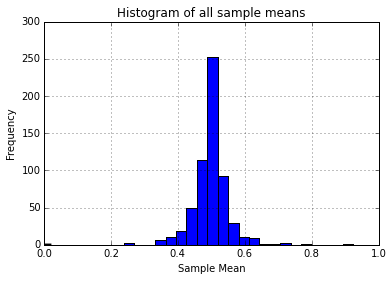

In [6]:
all_means = []

for val in data.values():
    for x in val:
        all_means.append(x[1])

#print(len(all_means))

plt.hist(all_means, bins=30)
plt.xlim(0,1)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of all sample means')

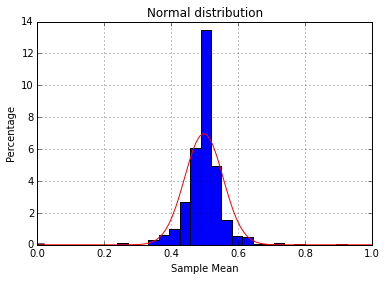

In [7]:

param = norm.fit(all_means) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution

x = np.linspace(0,1,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-')
plt.hist(all_means, normed=1, bins=30)
plt.xlim(0,1)
plt.xlabel('Sample Mean')
plt.ylabel('Percentage')
plt.grid()
plt.show()